In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

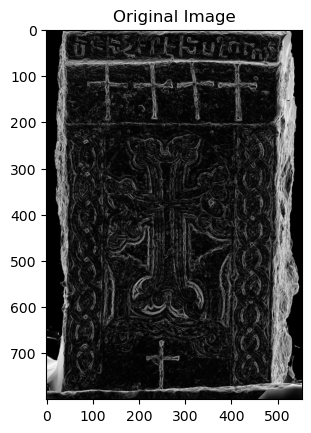

In [19]:
image = cv2.imread('.exp/N-002_bw.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.bitwise_not(image)

plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()

In [20]:
# Apply Hough Transform
edges = cv2.Canny(image, 50, 150)
lines_ = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

if lines_ is None:
    print("No lines detected")
    exit()

rho_values, theta_values = zip(*[line[0] for line in lines_])

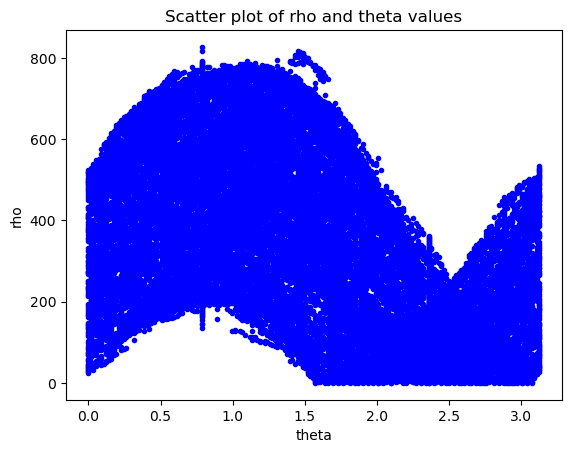

In [21]:
# Scatter plot of rho and theta values
rho_values = tuple(map(abs, rho_values))

plt.scatter(theta_values, rho_values, marker='.', color='blue')
plt.title('Scatter plot of rho and theta values')
plt.xlabel('theta'); plt.ylabel('rho')
plt.show()

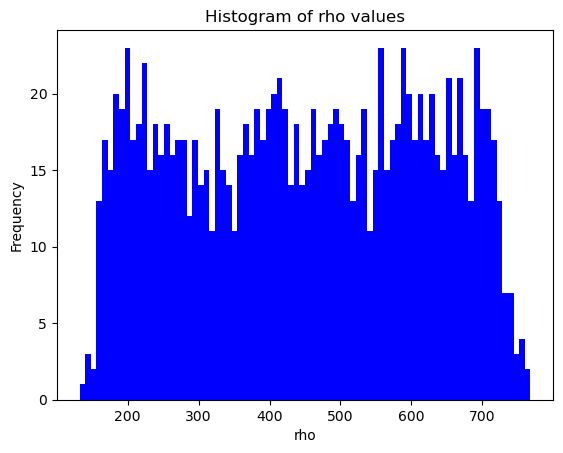

In [32]:
# Histogram of rho values per theta
approx_value = 0.5
padding = 0.1

filtered_rho_values = []
theta_min, theta_max = approx_value - padding, approx_value + padding
for i, val in enumerate(zip(theta_values, rho_values)):
    if theta_min < val[0] < theta_max:
        filtered_rho_values.append(val[1])
    

plt.hist(filtered_rho_values, bins=80, color='blue')
plt.title('Histogram of rho values')
plt.xlabel('rho'); plt.ylabel('Frequency')
plt.show()